In [17]:
from utils.detect_line import *
from PIL import Image

from drawpic import *

# 读取配置
cfg = get_cfg_defaults()
cfg.SAVE_DIR = f'workdir/run/{random.randint(0, 100000):06d}/'
os.makedirs(cfg.SAVE_DIR, exist_ok=True)
print(cfg)

DETECT:
  HEIGHT: 2048
  WIDTH: 2048
ELINE:
  ANGLE: 1
  EPS: 3
GET_LINKS_EPS: 1
MAX_CONTINUE: 10
SAVE_DIR: workdir/run/074660/


## 获取线元elines

In [18]:
ori_img = cv2.imread("img.png")
# ori_img = ori_img[3000:-3000, 3000:-3000, :]  # 为了更快看到结果，只截取一部分
Image.fromarray(ori_img).save(cfg.SAVE_DIR + 'ori.png')

elines = get_eline_faster(ori_img,cfg)

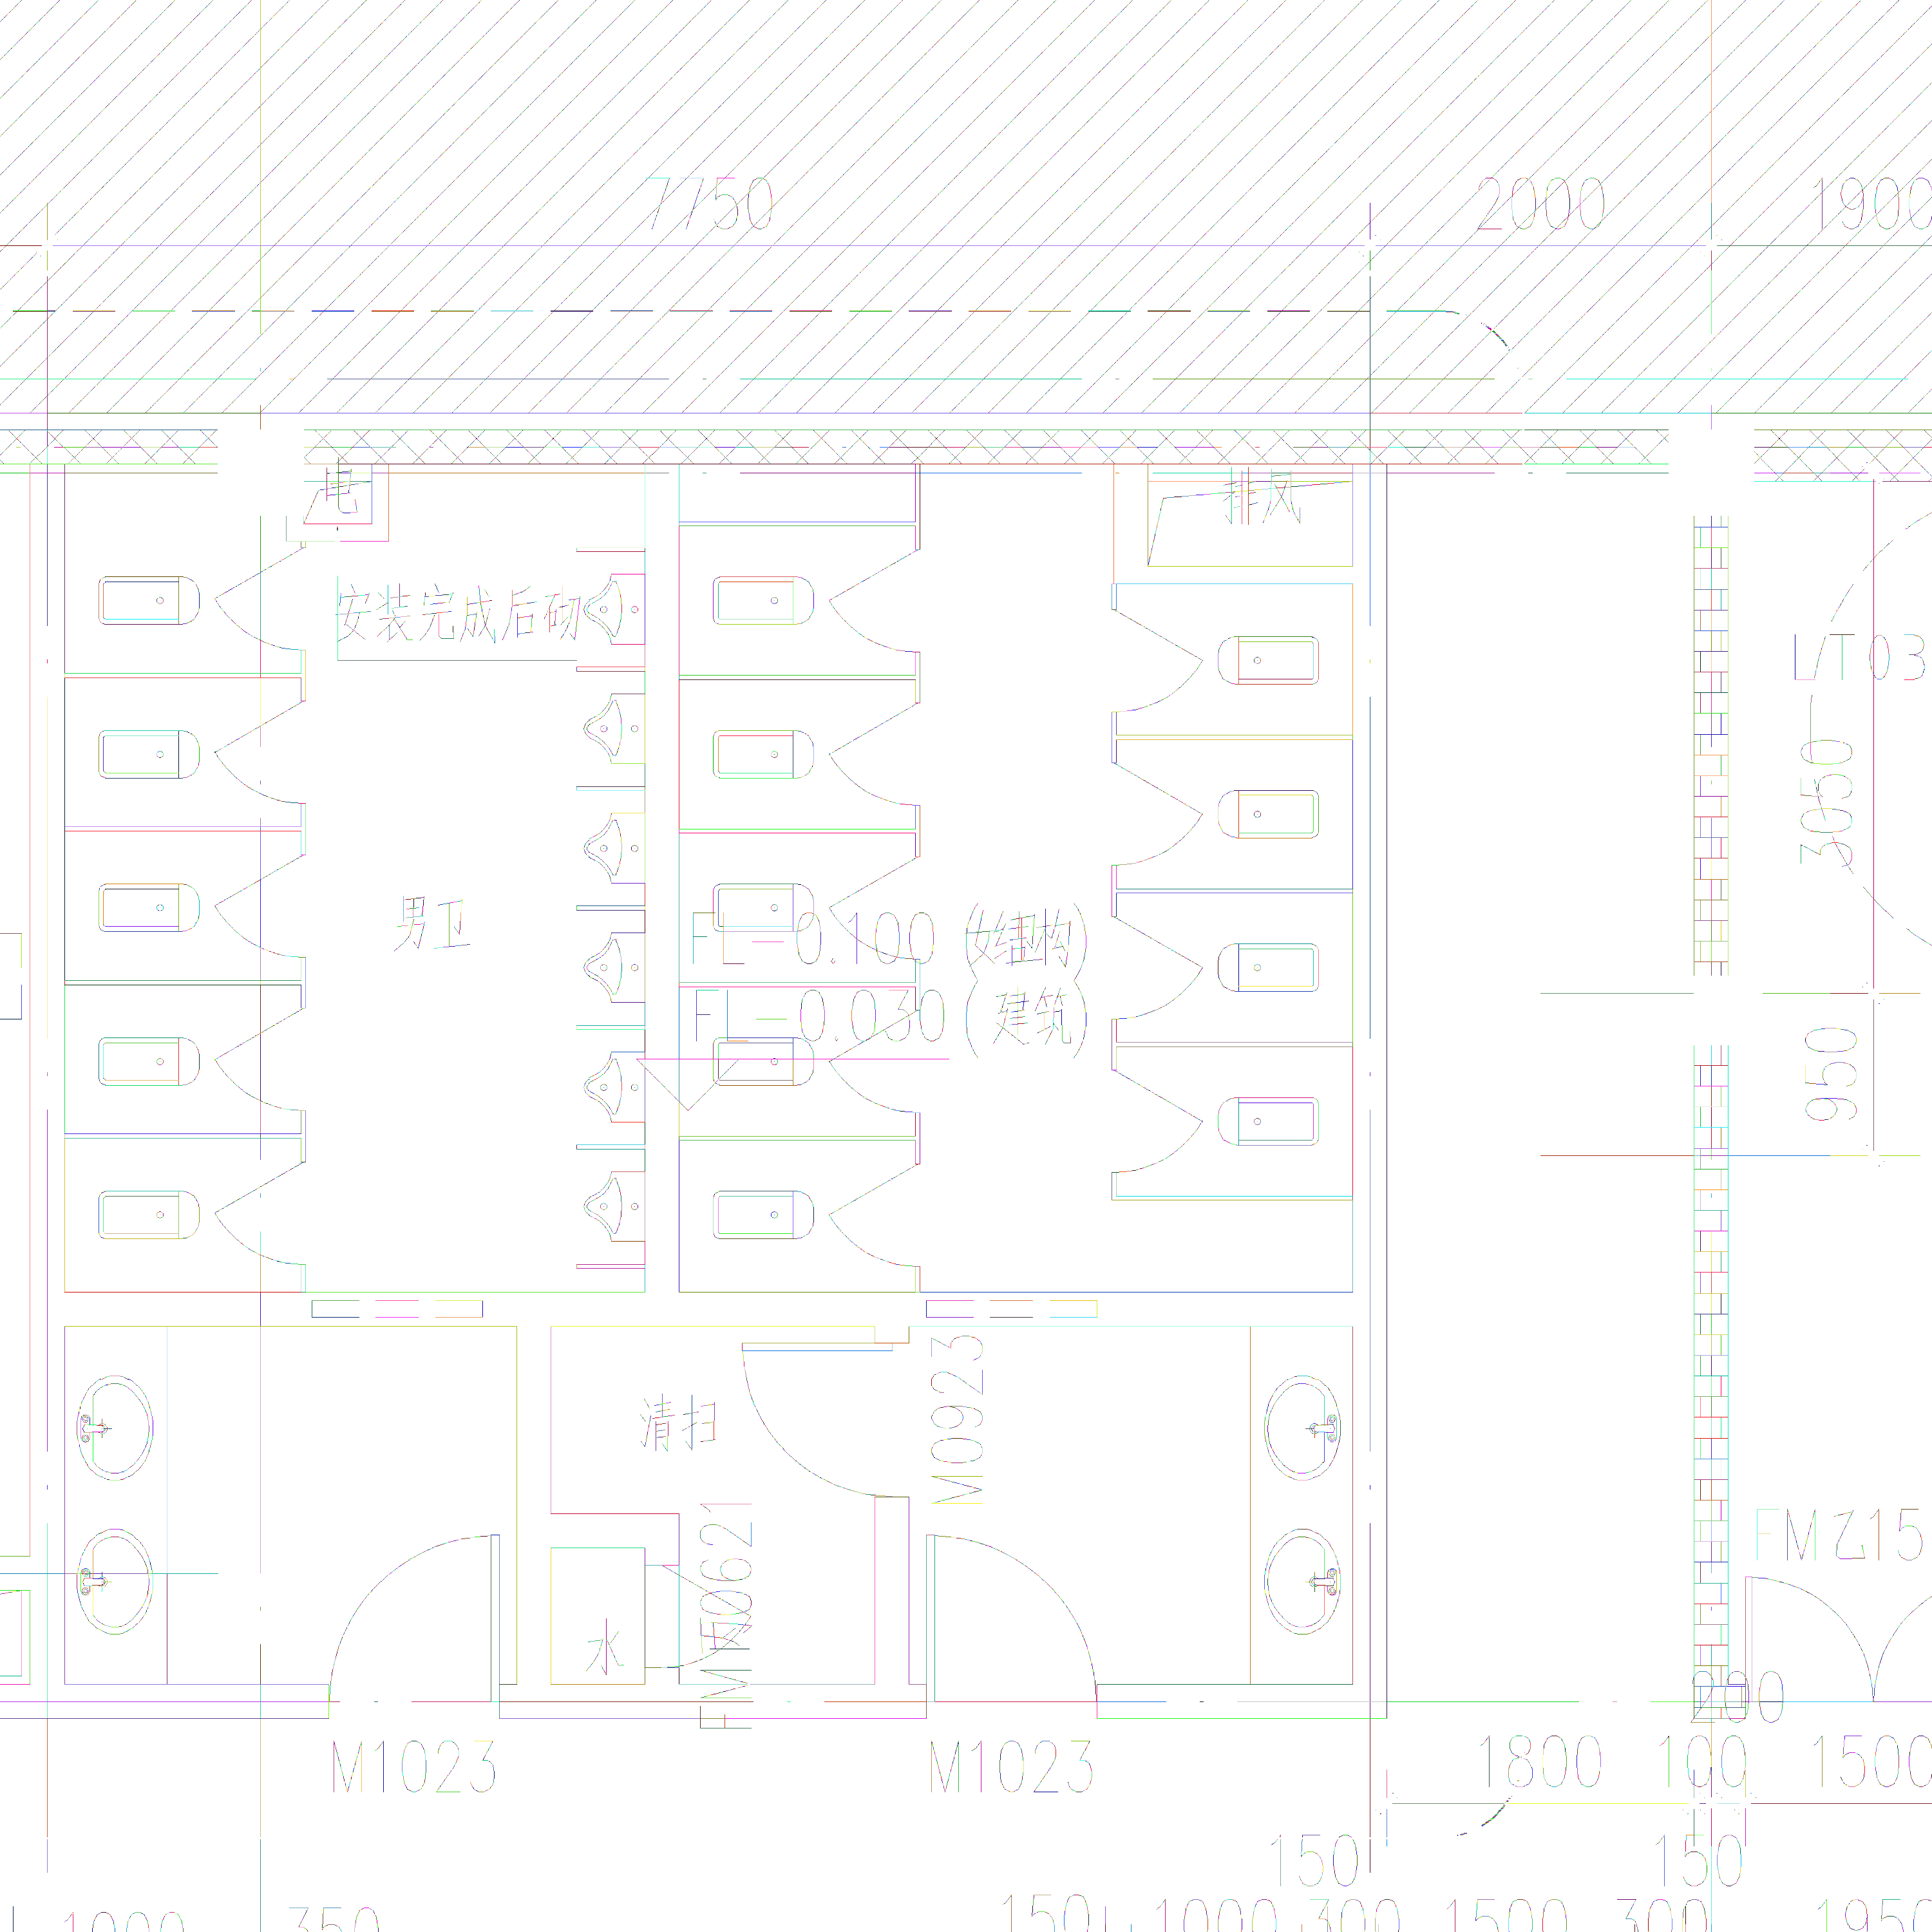

In [20]:
elines_img = draw_Eline_r(ori_img,elines,'elines',cfg)
Image.fromarray(elines_img)

## 统计线元信息

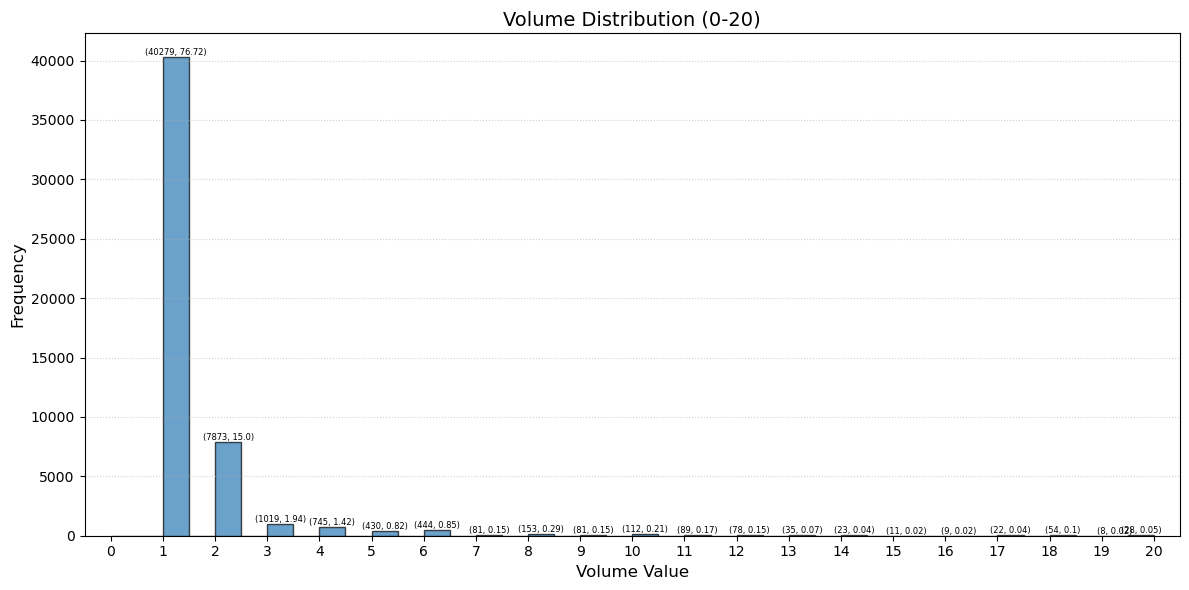

In [85]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 原始数据准备时直接过滤
volumes = [eline.volume for eline in elines if 0 <= eline.volume <= 20]  # 关键过滤语句
all = 52498

# 自动计算分箱参数（基于过滤后的数据）
max_vol = max(volumes) if volumes else 0  # 处理空数据保护
min_vol = min(volumes) if volumes else 0
bin_width = 0.5  # 可调整分箱精度
bins = np.arange(0, 20 + bin_width, bin_width)  # 强制分箱范围为0-20
# 创建直方图
plt.figure(figsize=(12, 6))
counts, edges, bars = plt.hist(volumes,
                             bins=bins,
                             edgecolor='black',
                             alpha=0.7,
                             color='#2c7bb6')

# 优化标注
plt.title('Volume Distribution (0-20)', fontsize=14)
plt.xlabel('Volume Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.6)

# 显示非零值标签
for bar in bars:
    height = bar.get_height()
    percent = (height / all) * 100
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2.,
                height + 0.2,
                f'{int(height),round(percent,2)}',
                ha='center',
                va='bottom',
                fontsize=6)

# 强制坐标轴范围
plt.xlim(-0.5, 20.5)  # 留出边界空隙
plt.xticks(np.arange(0, 21, 1))  # 显示偶数刻度

plt.tight_layout()
plt.show()

In [105]:
# volume_count = {10: 2, 20: 3, 30: 1}
# 提取数据
# 原始数据准备时直接过滤
volumes = [eline.volume for eline in elines if 0 <= eline.volume <= 20]  # 关键过滤语句
all = 52498
# volumes = [eline.volume for eline in elines]
volume_count = Counter(volumes)
volumes = sorted(volume_count.keys())
counts = [volume_count[volume] for volume in volumes]

0 76.72482761248047
1 91.72158939388167
2 93.66261571869404
3 95.08171739875804
4 95.90079622080842
5 96.74654272543715
6 96.90083431749781
7 97.19227399139014
8 97.3465655834508
9 97.55990704407786
10 97.7294373118976
11 97.8780144005486
12 97.94468360699456
13 97.9884947998019
14 98.00944797897063
15 98.02659148919959
16 98.06849784753705
17 98.1713589089108
18 98.18659758466988
19 98.23993294982665


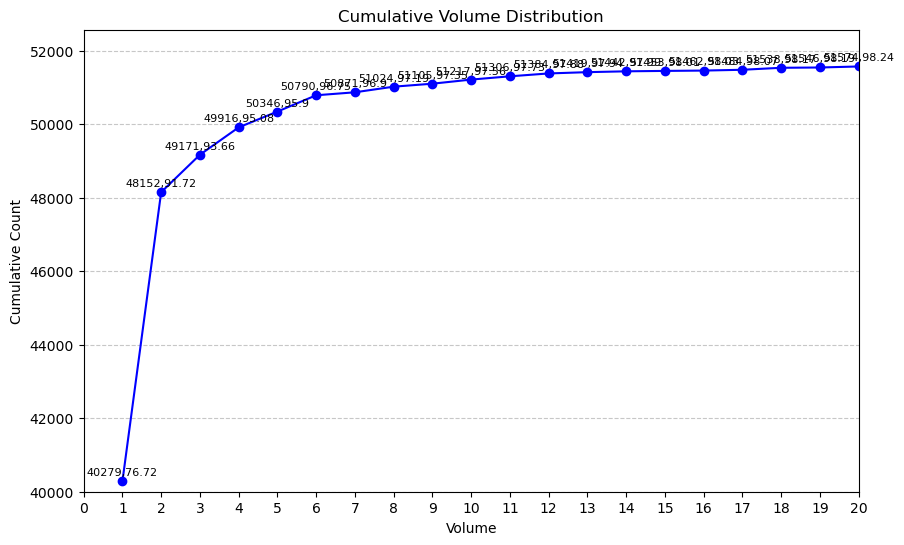

In [118]:

# 计算累计值
cumulative_counts = []
cumulative = 0
for count in counts:
    cumulative += count
    cumulative_counts.append(cumulative)

# 创建累计图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.plot(volumes, cumulative_counts, marker='o', linestyle='-', color='blue')

# 显示非零值标签
for i, (volume, cumulative) in enumerate(zip(volumes, cumulative_counts)):
    percent = (cumulative / all) * 100
    if cumulative > 0:
        # 将标签向上移动一点，避免与点重叠
        plt.text(volume, cumulative + 100.5, f'{cumulative},{round(percent,2)}', ha='center', va='bottom', fontsize=8)
    print(i,percent)

# 添加标题和标签
plt.title('Cumulative Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Cumulative Count')

# 设置 X 轴范围
plt.xlim(0, 20)  # 设置 X 轴范围略大于最大体积值
plt.ylim(40000, max(cumulative_counts) + 1000)  # 设置 Y 轴范围略大于最大累计值
plt.xticks(np.arange(0, 21, 1))
# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示累计图
plt.show()

## 消除>=3的线元


In [125]:
# new_img是消除线元后的原图
def remove_bigelines(ori_img,vol_threshold):
    new3_img = ori_img.copy()
    for eline in elines:
        if eline.volume >= vol_threshold:
            new3_img = cv2.line(new3_img,eline.pt1,eline.pt2,(230,230,250),1)
    return new3_img

Image.fromarray(remove_bigelines(ori_img,3)).save(cfg.SAVE_DIR + 'new3.png')
Image.fromarray(remove_bigelines(ori_img,4)).save(cfg.SAVE_DIR + 'new4.png')
Image.fromarray(remove_bigelines(ori_img,5)).save(cfg.SAVE_DIR + 'new5.png')
Image.fromarray(remove_bigelines(ori_img,6)).save(cfg.SAVE_DIR + 'new6.png')
Image.fromarray(remove_bigelines(ori_img,6)).save(cfg.SAVE_DIR + 'new7.png')
